# **Data Analysis On Video Game Sales And Ratings**
Dataset from: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

## **0. Imports**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Exploratory Data Analysis**

### **1.1 Overview**

In [88]:
video_games_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

print('Number of data points = {}'.format(video_games_df.shape[0]))
print('Shape: {}'.format(video_games_df.shape))
print('Columns: {}'.format(list(video_games_df.columns)))

Number of data points = 16719
Shape: (16719, 16)
Columns: ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


In [89]:
print(video_games_df.info())
video_games_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### **1.2 Missing Values**

In [90]:
def display_missing(df):
    nummissing = 0
    for col in df.columns.tolist():
        if df[col].isnull().sum() > 0:
            num_missing = df[col].isnull().sum()
            percent_missing = (num_missing / df.shape[0]) * 100
            print('{} column missing values: {} ({:.2f}%)'.format(col, num_missing, percent_missing))
            nummissing += 1
    if nummissing == 0:
        print('No missing values in the dataset')
    print('\n')

display_missing(video_games_df)

Name column missing values: 2 (0.01%)
Year_of_Release column missing values: 269 (1.61%)
Genre column missing values: 2 (0.01%)
Publisher column missing values: 54 (0.32%)
Critic_Score column missing values: 8582 (51.33%)
Critic_Count column missing values: 8582 (51.33%)
User_Score column missing values: 6704 (40.10%)
User_Count column missing values: 9129 (54.60%)
Developer column missing values: 6623 (39.61%)
Rating column missing values: 6769 (40.49%)




In [91]:
video_games_df.dropna(subset=['Name', 'Genre', 'Publisher', 'Year_of_Release'], inplace=True)
display_missing(video_games_df)

Critic_Score column missing values: 8434 (51.38%)
Critic_Count column missing values: 8434 (51.38%)
User_Score column missing values: 6579 (40.08%)
User_Count column missing values: 8955 (54.55%)
Developer column missing values: 6512 (39.67%)
Rating column missing values: 6649 (40.50%)




### **1.3 Unique Values**

In [92]:
print('Number of data points = {}'.format(video_games_df.shape[0]))
print('Number of unique values: ')
video_games_df.nunique()

Number of data points = 16416
Number of unique values: 


Name               11397
Platform              31
Year_of_Release       39
Genre                 12
Publisher            579
NA_Sales             401
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         628
Critic_Score          81
Critic_Count         106
User_Score            96
User_Count           883
Developer           1680
Rating                 8
dtype: int64

### **1.4 Data Types**

In [96]:
video_games_df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [97]:
video_games_df['User_Score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [98]:
video_games_df['Year_of_Release'] = video_games_df['Year_of_Release'].astype(np.int64)
video_games_df['User_Score'] = video_games_df['User_Score'].str.replace('tbd', 'NaN')
video_games_df['User_Score'] = video_games_df['User_Score'].astype(np.float64)

print(video_games_df.dtypes)

video_games_df.head()

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
index,,,,,,,,,,,,,,,,
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
video_games_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16413.000000,16413.000000,16413.000000,16413.000000,16413.000000,16413.000000,7979.000000,7979.000000,7458.00000,7458.000000
mean,2006.489734,0.264115,0.146038,0.078636,0.047670,0.536712,68.991979,26.439027,7.12675,162.972513
std,5.881505,0.819078,0.507179,0.311375,0.188173,1.560011,13.918844,19.010127,1.49890,564.029712
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.00000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.40000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.50000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.20000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.70000,10665.000000


### **1.5 Ratings**

In [100]:
video_games_df['Rating'].value_counts()

E       3920
T       2902
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: Rating, dtype: int64

In [101]:
video_games_df.loc[video_games_df.Rating == 'RP']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
index,,,,,,,,,,,,,,,,
14272,Supreme Ruler: Cold War,PC,2011,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63.0,12.0,6.8,27.0,BattleGoat Studios,RP


In [102]:
video_games_df.loc[14272, 'Rating'] = 'E10+'

In [103]:
video_games_df['Rating'] = video_games_df['Rating'].str.replace('EC', 'E')
video_games_df['Rating'] = video_games_df['Rating'].str.replace('K-A', 'E')
video_games_df['Rating'] = video_games_df['Rating'].str.replace('AO', 'M')
print('Unique Ratings: {}'.format(video_games_df['Rating'].unique()))

rating_order = {'E':'1.0', 'E10+':'2.0', 'T':'3.0', 'M':'4.0'}
inv_rating_order = {v: k for k, v in rating_order.items()}
video_games_df['Rating'] = video_games_df['Rating'].map(rating_order)

video_games_df['Rating'] = video_games_df['Rating'].astype(np.float64)
print('Unique Ratings: {}'.format(video_games_df['Rating'].unique()))

Unique Ratings: ['E' nan 'M' 'T' 'E10+']
Unique Ratings: [ 1. nan  4.  3.  2.]


# 

### **1.6 Correlations**

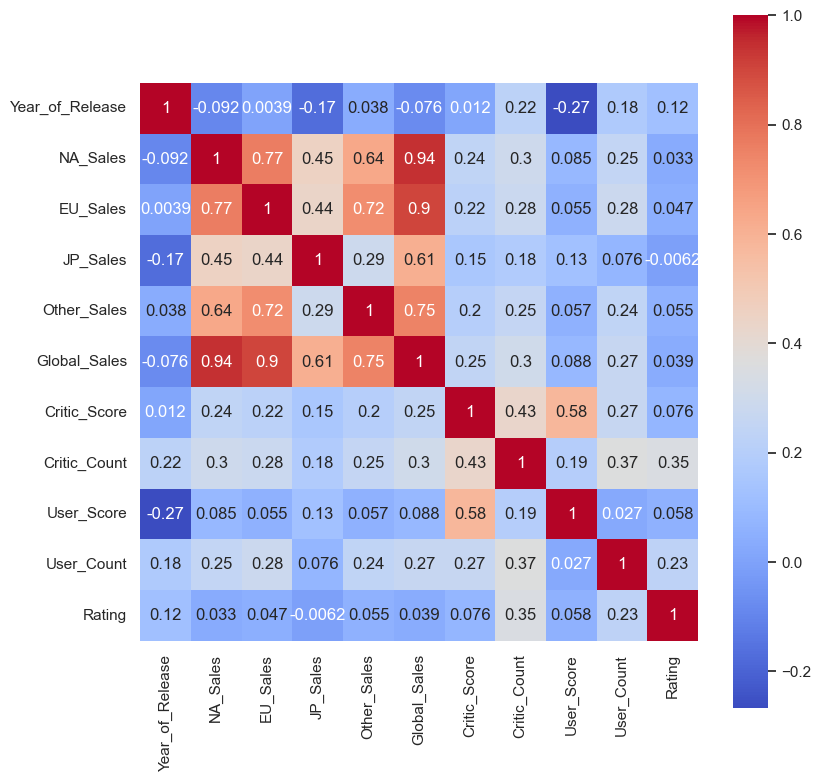

In [104]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(nrows=1, figsize=(9, 9))
c = video_games_df.corr()
sns.heatmap(video_games_df.corr(),  annot=True, square=True, cmap='coolwarm')
plt.show()

## **2. Further Analysis**

### **2.1 Sales**

In [105]:
sales_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

video_games_df[sales_features].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16413.000000,16413.000000,16413.000000,16413.000000,16413.000000
mean,0.264115,0.146038,0.078636,0.047670,0.536712
std,0.819078,0.507179,0.311375,0.188173,1.560011
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,0.470000
max,41.360000,28.960000,10.220000,10.570000,82.530000


Since the global sales mean is between the 75th percentile and the max value, we can see that the average is skewed upward by large outliers and is much larger than the median value.

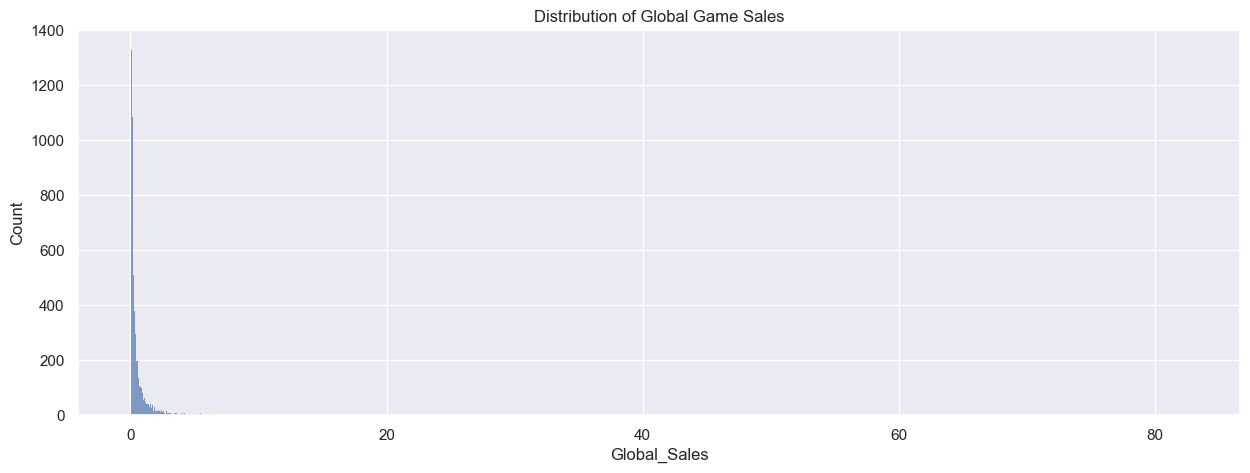

In [106]:
plt.figure(figsize=(15,5))
plt.title('Distribution of Global Game Sales')
sns.histplot(x='Global_Sales', data=video_games_df)
plt.ylim(ymin=0,ymax=1400)
plt.show()

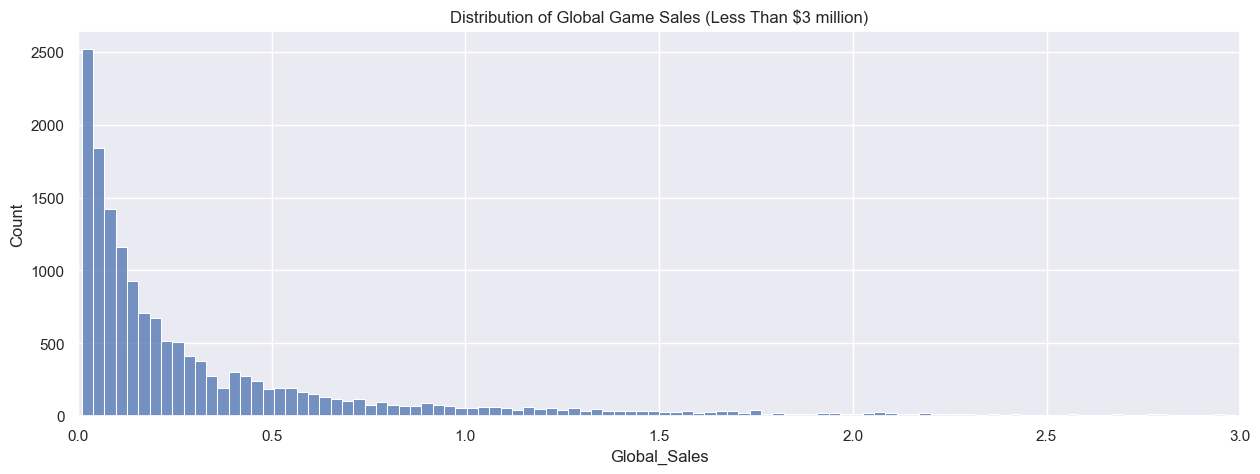

In [107]:
video_games_less_than_3 = video_games_df[video_games_df['Global_Sales'] < 3]

plt.figure(figsize=(15,5))
plt.title('Distribution of Global Game Sales (Less Than $3 million)')
sns.histplot(x='Global_Sales', data=video_games_less_than_3)
plt.xlim(xmin=0,xmax=3)
plt.show()

### **2.2 Ratings**

In [108]:
ratings_features = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

video_games_df[ratings_features].describe()

,Critic_Score,Critic_Count,User_Score,User_Count
count,7979.000000,7979.000000,7458.00000,7458.000000
mean,68.991979,26.439027,7.12675,162.972513
std,13.918844,19.010127,1.49890,564.029712
min,13.000000,3.000000,0.00000,4.000000
25%,60.000000,12.000000,6.40000,10.000000
50%,71.000000,22.000000,7.50000,24.000000
75%,79.000000,36.000000,8.20000,81.000000
max,98.000000,113.000000,9.70000,10665.000000


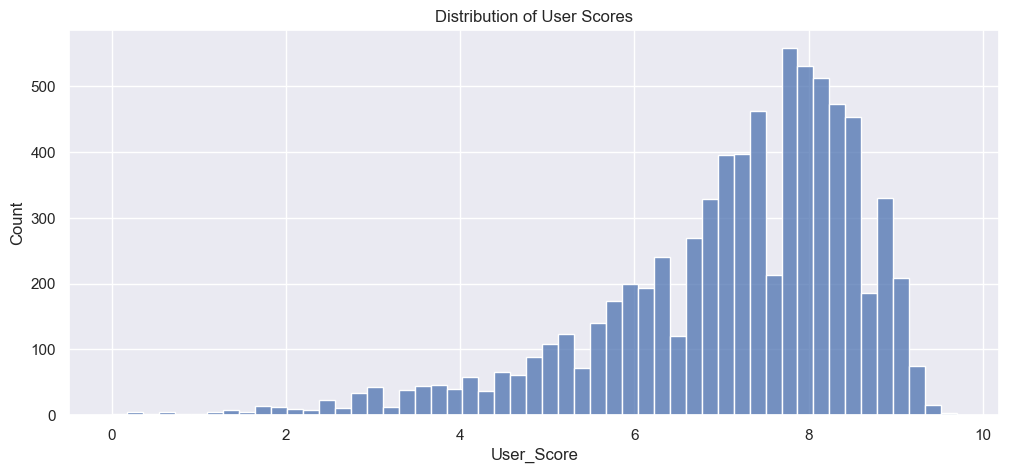

In [109]:
plt.figure(figsize=(12,5))
plt.title('Distribution of User Scores')
sns.histplot(x='User_Score', data=video_games_df)
plt.show()

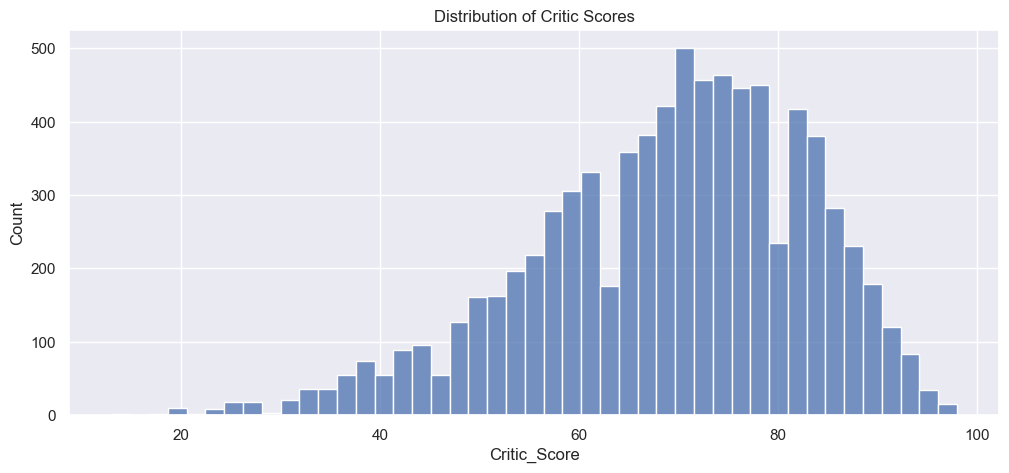

In [110]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Critic Scores')
sns.histplot(x='Critic_Score', data=video_games_df)
plt.show()

### **2.3 Genre**

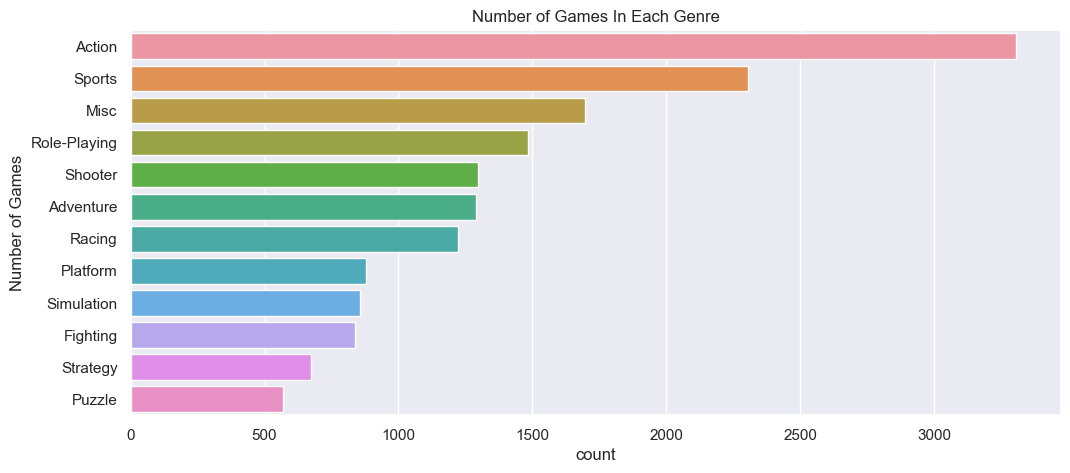

In [111]:
plt.figure(figsize=(12,5))
plt.title('Number of Games In Each Genre')
ax = sns.countplot(y="Genre", data=video_games_df, order=video_games_df['Genre'].value_counts().index)
plt.ylabel('Number of Games')
plt.show()

#### **Genre and Sales**

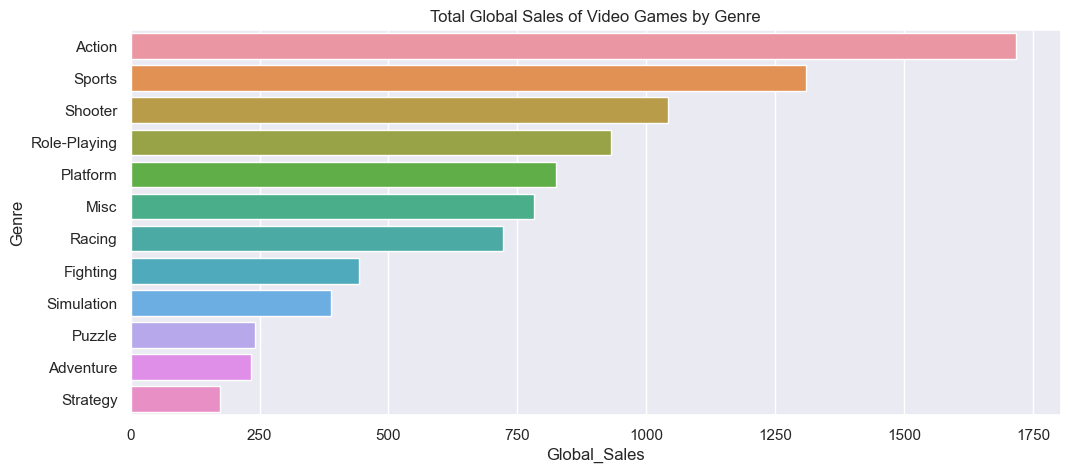

In [112]:
plt.figure(figsize=(12,5))
plt.title("Total Global Sales of Video Games by Genre")
genre_sum_df = video_games_df.groupby('Genre', as_index=False).sum()
sns.barplot(data=genre_sum_df, x='Global_Sales', y='Genre', order=genre_sum_df.sort_values('Global_Sales', ascending=False).Genre)
plt.show()

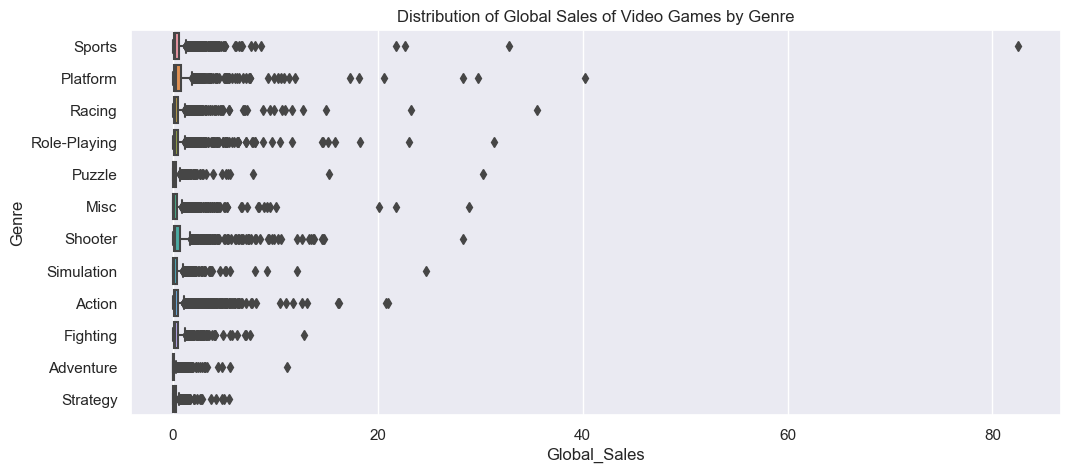

In [113]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Global Sales of Video Games by Genre")
sns.boxplot(data=video_games_df, x='Global_Sales', y='Genre')
plt.show()

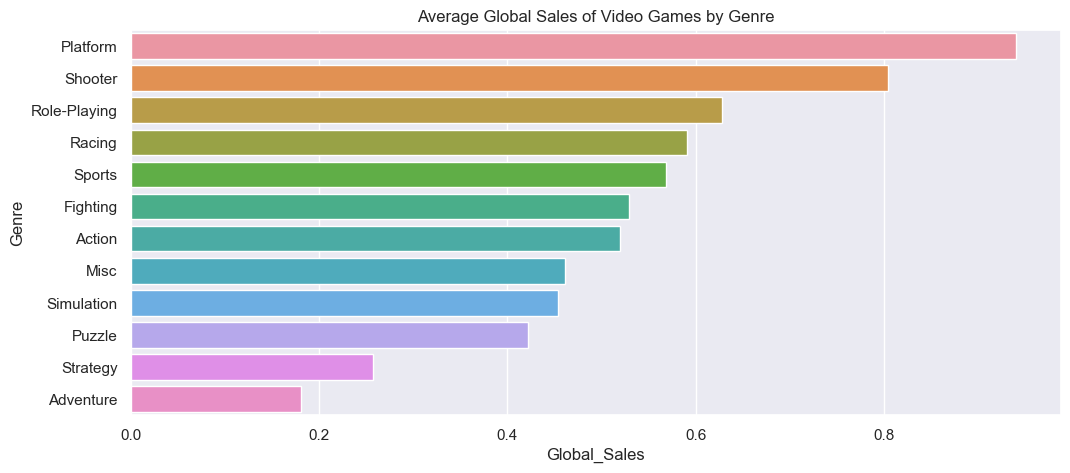

In [114]:
plt.figure(figsize=(12,5))
plt.title("Average Global Sales of Video Games by Genre")
genre_mean_df = video_games_df.groupby('Genre', as_index=False).mean()
sns.barplot(data=genre_mean_df, x='Global_Sales', y='Genre', order=genre_mean_df.sort_values('Global_Sales', ascending=False).Genre)
plt.show()

### **2.4 ESRB Rating**

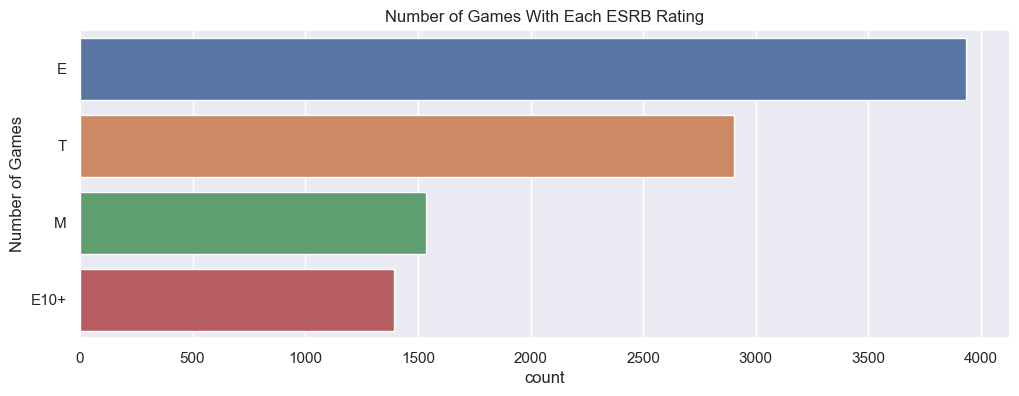

In [115]:
video_games_df['Rating'] = video_games_df['Rating'].astype(str)
video_games_df['Rating'] = video_games_df['Rating'].map(inv_rating_order)

plt.figure(figsize=(12,4))
plt.title('Number of Games With Each ESRB Rating')
ax = sns.countplot(y="Rating", data=video_games_df, order=video_games_df['Rating'].value_counts().index)
plt.ylabel('Number of Games')
plt.show()

#### **Ratings and Sales**

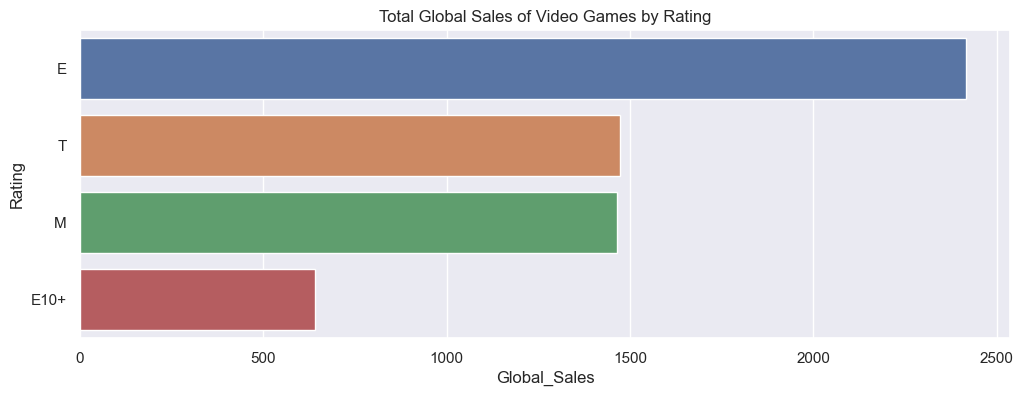

In [116]:
plt.figure(figsize=(12,4))
plt.title("Total Global Sales of Video Games by Rating")
rating_sum_df = video_games_df.groupby('Rating', as_index=False).sum()
sns.barplot(data=rating_sum_df, x='Global_Sales', y='Rating', order=rating_sum_df.sort_values('Global_Sales', ascending=False).Rating)
plt.show()

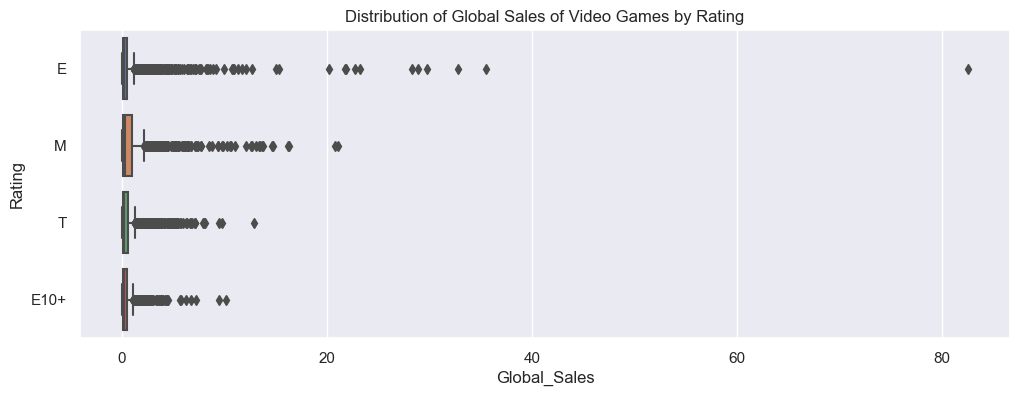

In [117]:
plt.figure(figsize=(12,4))
plt.title("Distribution of Global Sales of Video Games by Rating")
sns.boxplot(data=video_games_df, x='Global_Sales', y='Rating')
plt.show()

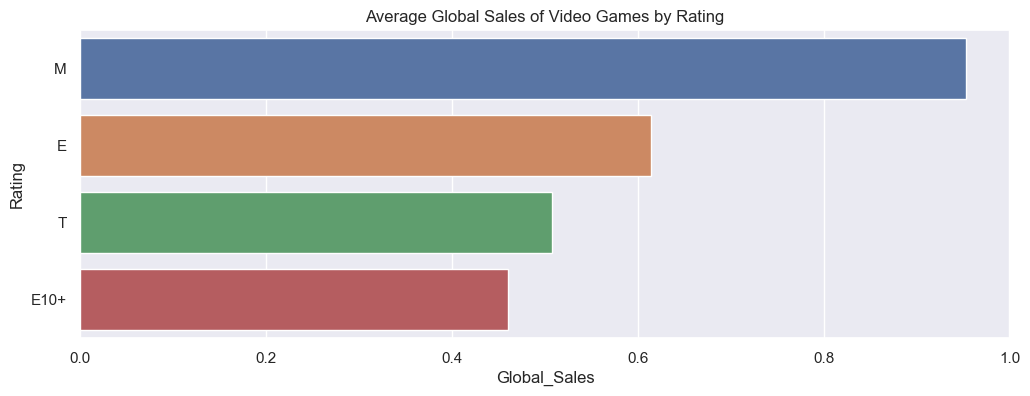

In [118]:
plt.figure(figsize=(12,4))
plt.title("Average Global Sales of Video Games by Rating")
rating_mean_df = video_games_df.groupby('Rating', as_index=False).mean()
sns.barplot(data=rating_mean_df, x='Global_Sales', y='Rating', order=rating_mean_df.sort_values('Global_Sales', ascending=False).Rating)
plt.show()

### **2.5 Platform**

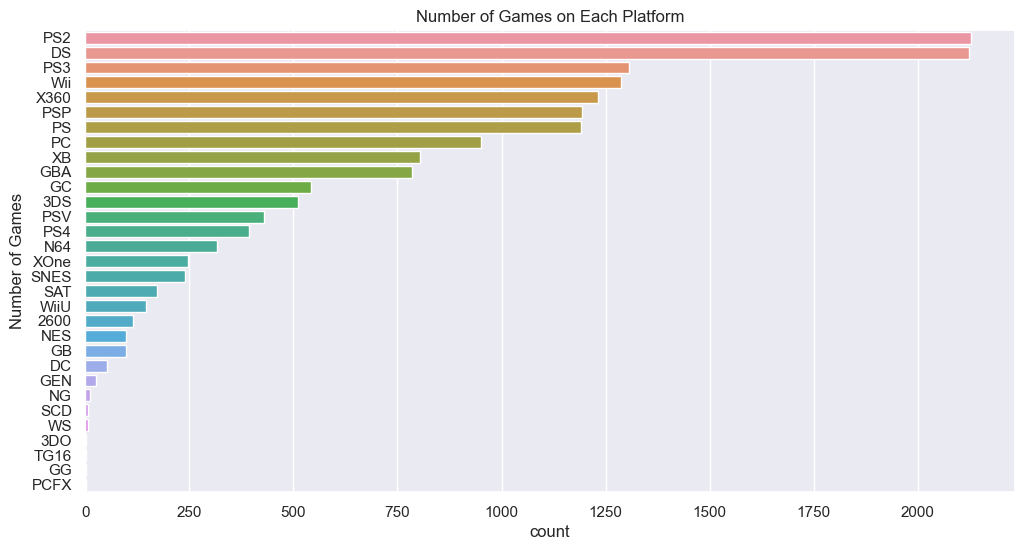

In [119]:
plt.figure(figsize=(12,6))
plt.title('Number of Games on Each Platform')
ax = sns.countplot(y="Platform", data=video_games_df, order=video_games_df['Platform'].value_counts().index)
plt.ylabel('Number of Games')
plt.show()

#### **Platform and Sales**

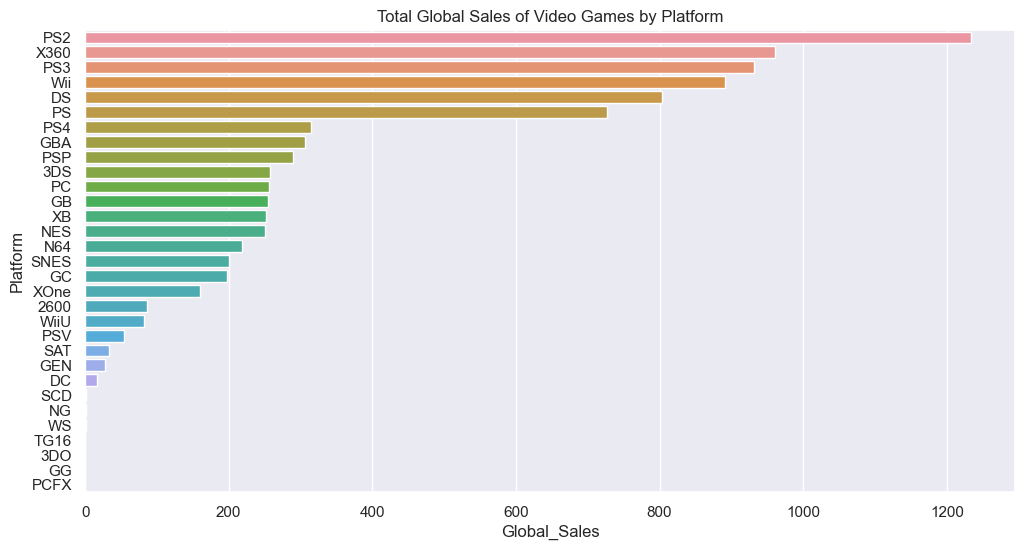

In [120]:
plt.figure(figsize=(12,6))
plt.title("Total Global Sales of Video Games by Platform")
platform_sum_df = video_games_df.groupby('Platform', as_index=False).sum()
sns.barplot(data=platform_sum_df, x='Global_Sales', y='Platform', order=platform_sum_df.sort_values('Global_Sales', ascending=False).Platform)
plt.show()

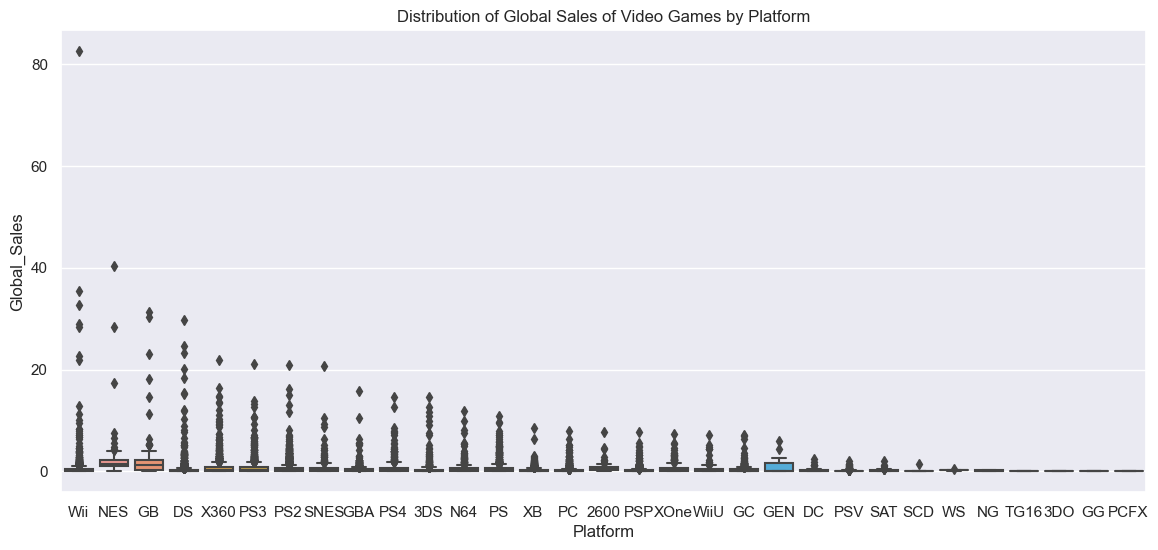

In [121]:
plt.figure(figsize=(14,6))
plt.title("Distribution of Global Sales of Video Games by Platform")
sns.boxplot(data=video_games_df, y='Global_Sales', x='Platform')
plt.show()

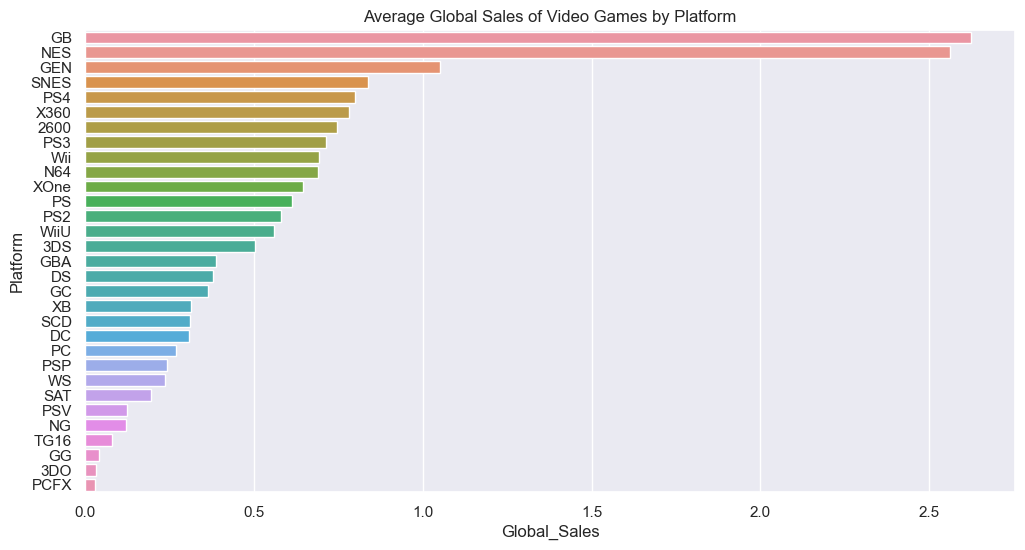

In [122]:
plt.figure(figsize=(12,6))
plt.title("Average Global Sales of Video Games by Platform")
platform_mean_df = video_games_df.groupby('Platform', as_index=False).mean()
sns.barplot(data=platform_mean_df, x='Global_Sales', y='Platform', order=platform_mean_df.sort_values('Global_Sales', ascending=False).Platform)
plt.show()

#### **Muliplatform Games**

In [123]:
multiplatform_titles = video_games_df[video_games_df['Name'].duplicated(keep=False)]
multiplatform_titles['Name'].value_counts()

Need for Speed: Most Wanted    10
LEGO Marvel Super Heroes        9
Ratatouille                     9
FIFA 14                         9
Terraria                        8
                               ..
Cool Boarders 2001              2
Quake II                        2
The Suffering                   2
High Rollers Casino             2
Akatsuki no Goei Trinity        2
Name: Name, Length: 2749, dtype: int64

In [127]:
video_games_df.loc[video_games_df.Name == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
index,,,,,,,,,,,,,,,,
253,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36.0,9.1,137.0,EA Canada,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,NaN,NaN,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,134.0,EA Canada,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32.0,8.8,29.0,EA Canada,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.33,0.45,0.01,0.22,1.01,NaN,NaN,NaN,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,80.0,18.0,9.1,22.0,EA Canada,T
6274,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.13,0.12,0.00,0.02,0.27,NaN,NaN,NaN,NaN,NaN,NaN
6411,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27,45.0,4.0,6.1,22.0,EA Canada,E
6474,Need for Speed: Most Wanted,GBA,2005,Racing,Electronic Arts,0.19,0.07,0.00,0.00,0.26,NaN,NaN,8.3,14.0,EA Canada,E


In [ ]:
#analyze multiplatform sales

### **2.6 Year of Release**

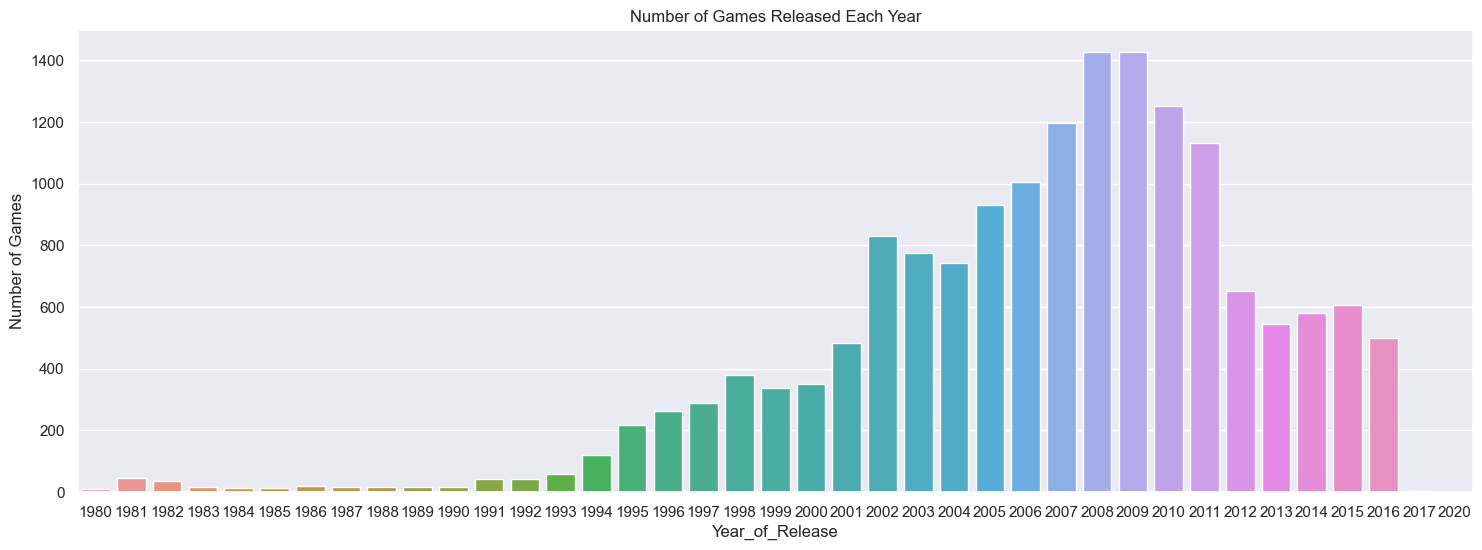

In [124]:
plt.figure(figsize=(18,6))
plt.title('Number of Games Released Each Year')
ax = sns.countplot(x="Year_of_Release", data=video_games_df)
plt.ylabel('Number of Games')
plt.show()

#### **Year of Release and Sales**

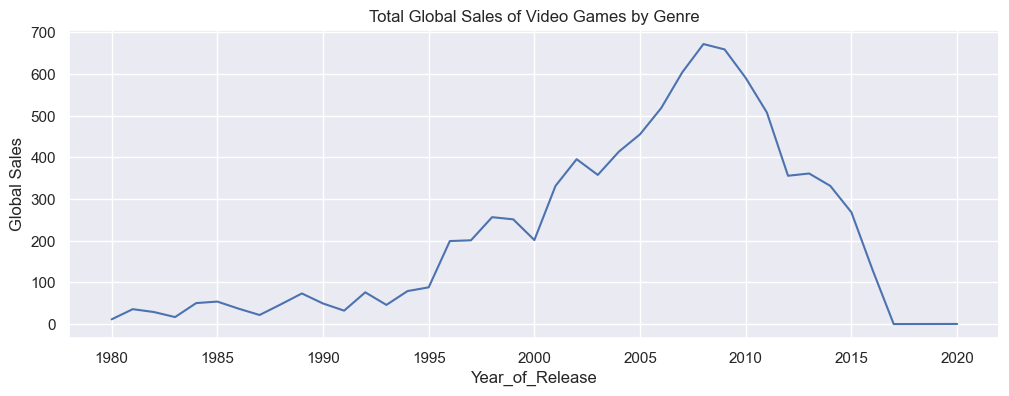

In [125]:
year_sum_df = video_games_df.groupby('Year_of_Release', as_index=False).sum()
plt.figure(figsize=(12,4))
plt.title("Total Global Sales of Video Games by Genre")
ax = sns.lineplot(x="Year_of_Release", y='Global_Sales', data=year_sum_df)
plt.ylabel('Global Sales')
plt.show()

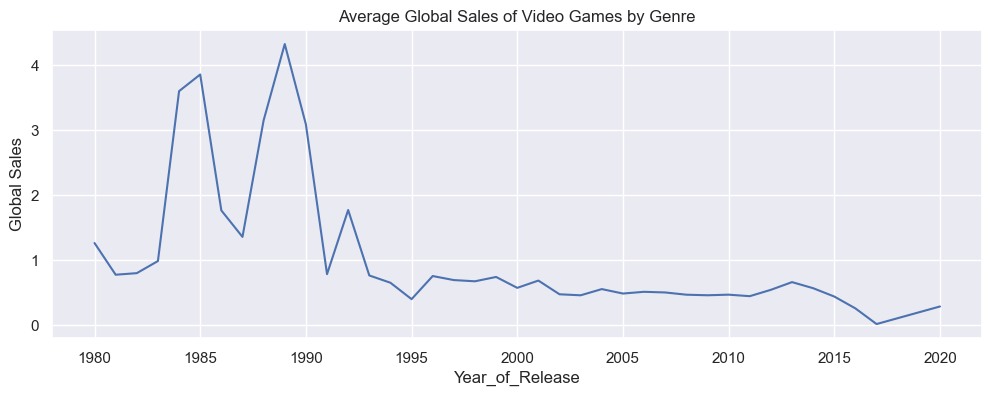

In [126]:
year_mean_df = video_games_df.groupby('Year_of_Release', as_index=False).mean()
plt.figure(figsize=(12,4))
plt.title("Average Global Sales of Video Games by Genre")
ax = sns.lineplot(x="Year_of_Release", y='Global_Sales', data=year_mean_df)
plt.ylabel('Global Sales')
plt.show()

### **2.7 aaa**